# **Consumo de Cerveja na cidade de São Paulo em 2015**

A cerveja é um dos tipos de bebidas mais consumidas em todo o mundo, isso não tem como negar. A verdade é que muitas pessoas em torno do mundo consome esse tipo de bebida em diferentes situações, seja: festas, casamentos, happy hour.

Quando pensamos no país que mais consome cerveja no mundo, pensamos na famosa Alemanhã e na sua famosa Oktober fest, certo? Mas, de acordo com a pesquisa realizada pela empresa Japonesa Kirin, **o país que mas consome cerveja é a República Checa**! A pesquisa mostrou que os Checos consomem em média 142.4 litros.

Com a finaladidade de entender um pouco mais sobre o comportamento do **consumo de cerveja em São Paulo**, usaremos um Data Set disponibilizado no [Kaggle](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo).



## Obtenção dos Dados

**O DataSet disponibilizado por Alexandre George Lustosa** traz uma coleta de dados do consumo de cerveja em um setor universitário onde há festas de estudantes entre 18 a 28 anos da cidade de São Paulo - Brasil. O Dataset fez registro de **7 variáveis no Total**: Data, Temperatura Máxima, Temperatura Mínima, Temperatura Média, Precipitação, Se é Final de Semana e Consumo de Cerveja em Litros.

A coleta dos dados desse Dataset se deu no **ano de 2015**.

## Importação dos dados


Os dados usados aqui foram obtidos a partir do link: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/download

O objetivo desse arquivo é uma análise exploratória inicial e, em seguida,  utilizar um método de predição através da regressão linear.

In [0]:
# Importando as bibliotecas necessárias para DataFrame e Visualizações.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Importando Biblioteca Necessária para Divisão do Data Frame:
from sklearn.model_selection import train_test_split

# Importando Biblioteca para Predição através da regressão Linear:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
# Importando o arquivo csv:
import pandas as pd
arquivo = 'https://raw.githubusercontent.com/GabrielTrentino/Projetos-de-Cursos/master/01-DataScience/04%20-%20Consumo_cerveja.csv'
df = pd.read_csv(arquivo)

## Análise dos Dados

Ao importarmos as bibliotecas e o arquivo ".csv" do Kaggle, temos que observar e descrever quais variáveis estão presentes nesse arquivo.

Dicionário desse Data Frame:

*   **Data** - Possui as Datas de 2015
*   **Temperatura Media (C)** - Temperatura média de cada dia em graus Celsius;
*   **Temperatura Minima (C)** - Temperatura minima de cada dia em graus Celsius;
*   **Temperatura Maxima (C)** - Temperatura máxima de cada dia em graus Celsius;
*   **Precipitacao (mm)** - Quantidade de chuva em mm por m² no dia;
*   **Final de Semana** - Se é ou não Final de Semana (0 não é, 1 é);
*   **Consumo de cerveja (litros)** - Consumo de cerveja.


### Q1. Como estão Distribuidos os primeiros e ultimos termos?

A primeira coisa que devemos nos atentar é sobre como os primeiros e ultimos dados do nosso dataframe estão se comportando, para isso visualizamos o começo e o final com "head()" e "tail()".

In [3]:
# Visualização dos 5 primeiros dias do Data Frame:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
# Visualização dos 5 ultimos dados do Data Frame:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aqui ja podemos ver dois problemas sérios no nosso banco de dados, temos:
*   **Linhas inteiras sem valores!**
*   **Valores com Vírgulas no lugar de pontos!**

Mas será que conseguimos rodar o *Data Frame* sem trocar as vírgulas por pontos?

### Q2. Conseguimos continuar a analise sem alterar os valores presentes?

Continuando essa exploração inicial, a pergunta que fica é: o quão bagunçado pode estar nosso *Data Frame*? Para isso, vamos aproveitar e visualizar rapidamente a distribuição dos nossos dados através da função ".describe()".

In [5]:
#Visualizando as variavéis através da função ".describe()"
df.describe().round(2)

,Final de Semana,Consumo de cerveja (litros)
count,365.00,365.00
mean,0.28,25.40
std,0.45,4.40
min,0.00,14.34
25%,0.00,22.01
50%,0.00,24.87
75%,1.00,28.63
max,1.00,37.94


Repare que apenas as variáveis "Final de Semana" e "Consumo de cerveja (litros)" apareceram. Isso acontece pois a função ".describe()" computa apenas as variáveis que são do tipo Inteiro ou Float. E a função describe não utilizou as variaveis de "Preciptação" e "Temperatura". Por que?

### Q3. Qual o tipo de Variável das Temperaturas e Preciptação?

Percebemos aqui que as variaveis de temperatura e preciptacao não aparecem ao chamarmos a função "describe()". Para descobrirmos seu tipo de variável, vamos 
chamar a função "type()", assim ela **retornará a classe/tipo da variável**.

In [6]:
#Verificando o tipo da variável:
print("Qual é o tipo de dado da Temperatura Mínima do primeiro Dia?")
print(type(df["Temperatura Minima (C)"][0]))

Qual é o tipo de dado da Temperatura Mínima do primeiro Dia?
<class 'str'>


Nesse DataFrame podemos observar três principais prolemas:

1.   Há linhas completas **sem valores** (Not a Number - NaN);
2.   Trocar o nome das colunas para facilitar futuras chamadas.
3.   Para o procesamento de dados é **necessário que os valores estejam separados por ponto** e não por vírgula. Os números das variaveis estão em formato String (str) e devemos **troca-las para o tipo número flutuante (float)**.


## **Corrigindo Problemas Iniciais no Data Frame**

### **PI 01:** Linhas Nulas.
Para corregirmos a quantidade de linhas com NaN é necessário identificar quantas linhas temos sem dados com a função "info()"

In [7]:
# Informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


A função "info()" nos informa que o Data Frame possui 941 linhas variando de (0 até 940). E, ao mesmo tempo, há 365 objetos que não são nulos (365 non-null).

Isso indica que há **576 linhas em branco (NaN)** e para arrumar o DataFrame, usamos a função "dropna()".

In [8]:
#Eliminando linhas nulas:
df = df.dropna()

#Verificando a correção inicial:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


### **PI 02**: Colunas com nomes compridos e espaçados.
Após essa limpeza inicial, temos que trocar os nomes das colunas do nosso *Data Frame* para isso, utilizamos a seguinte atribuição.

In [9]:
#Trocando os nomes das colunas:
df.columns = ["dia","temp_med","temp_min", "temp_max", "precipitacao", "fds", "consumo_cerveja"]

#Verificando a correção das colunas:
df.head()

,dia,temp_med,temp_min,temp_max,precipitacao,fds,consumo_cerveja
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### **PI 03**: Virgula no lugar de ponto.
Continuando nossa correção do *Data Frame*, temos que **trocar as vírgulas existentes por pontos**. Utilizamos a função ".replace("," , ".") para isso.

Em seguida **trocamos o tipo da variável para float** com a função ".astype(float)".

In [0]:
df["temp_med"] = df["temp_med"].str.replace(",",".").astype(float)
df["temp_min"] = df["temp_min"].str.replace(",",".").astype(float)
df["temp_max"] = df["temp_max"].str.replace(",",".").astype(float)
df["precipitacao"] = df["precipitacao"].str.replace(",",".").astype(float)

## **Continuação da Análise Exploratória**

### Q4. Como está o DataFrame após a Correção?

Continuando com a nossa Análise Exploratória, é necessário visualizar e perceber a presença de outliers no nosso DataFrame. Para uma primeira visualização simplória, utilizamos a função "describe()" no DataFrame.

In [11]:
#Visualizando a distribuição das variáveis através da função ".describe()":
df.describe().round(2)

,temp_med,temp_min,temp_max,precipitacao,fds,consumo_cerveja
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


Vimos que com o nosso *Data Frame* corrigido. Estamos começando a visualizar o que está nesse conjunto de dados. E agora? Vamos ver o Histograma (as Distribuições das variáveis) para termos uma melhor compreensão dos nossos dados.

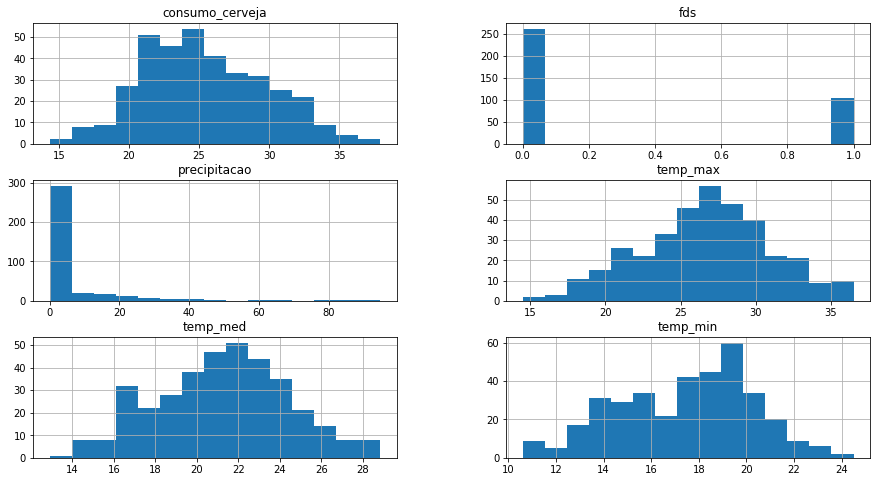

In [12]:
#Plotando Histogramas das Variáveis pertencentes ao Data Frame:
df.hist(bins = 15, figsize = (15,8));

A Distribuição/Variação das nossas variaveis ocorrem de forma bem similar, exceto para a precipitação.

### Q5. Há outliers para a Precipitação?
Na Precipitação vemos que 75% dos menores valores estão em 3.20, porém, o valor máximo é de 94.80. O que pode ter acontecido? Isso afetará analises futuras?

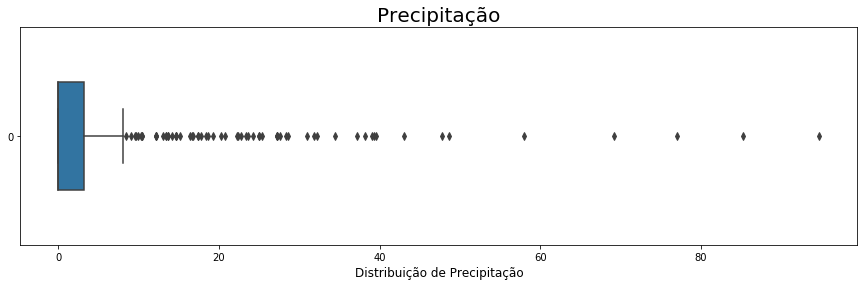

In [13]:
#Plotando gráfico do tipo Box para a Precipitação:
ax = sns.boxplot(data=df["precipitacao"], orient="h", width = 0.5)

#Formatando o Display do Gráfico:
ax.figure.set_size_inches(15,4)
ax.set_title("Precipitação",fontsize = 20)
ax.set_xlabel('Distribuição de Precipitação', fontsize= 12)

#Imprimindo o Gráfico na tela:
ax

Rodamos o gráfico de Precipitação e pode-se notar que a maior concentração do nosso DataFrame está abaixo da precipitação de 5mm. 

Para a nossa análise, é provável que esses poucos outliers não influenciem diretamente.

### Q6. Como está o Consumo de Cerveja ao decorrer do Ano?

Em seguida, vamos plotar o gráfico do Consumo de Cerveja de acordo com os dias do ano.

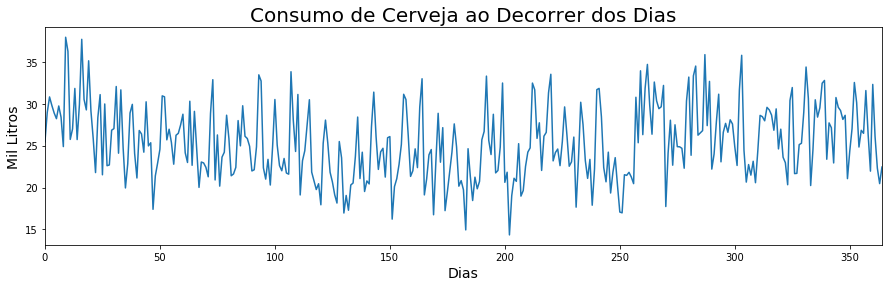

In [14]:
#Plotando gráfico para o Consumo de Cerveja:
fig, ax = plt.subplots(figsize=(15,4))

#Formatando o Display do Gráfico:
ax.set_title("Consumo de Cerveja ao Decorrer dos Dias", fontsize = 20)
ax.set_xlabel("Dias", fontsize = 14)
ax.set_ylabel("Mil Litros", fontsize=14)

#Imprimindo o Gráfico na tela:
ax = df["consumo_cerveja"].plot()

 Conseguimos observar uma leve queda média do consumo entre os dias 150 a 250.

 Ok, vamos ver como essa distribuição ocorre de acordo com os finais de semana. Afinal, nosso gráfico está com valores explosivos (variando bastante). A **primeira hipotese** é que o Final de Semana irá influenciar no consumo de cerveja, afinal é culturalmente esperável que isso ocorra.

In [15]:
df["dia"]= pd.to_datetime(df["dia"]) 
df['month'] = pd.to_datetime(df['dia']).dt.month
ax = go.Figure(data=go.Box(x=df.month,y=df.consumo_cerveja))
ax.update_layout(title = "Distribuição do Consumo de Cerveja Mês a Mês",
                 xaxis_title = "Meses",
                 yaxis_title = "Consumo de Cerveja (Mil Litros)")
ax

### Q7. No Final de Semana, há um maior Consumo de Cerveja?
 Iremos plotar a diferença entre Final de Semana ('fds'=1) e Meio de Semana ('fds'=0) através do ".violinplot()".

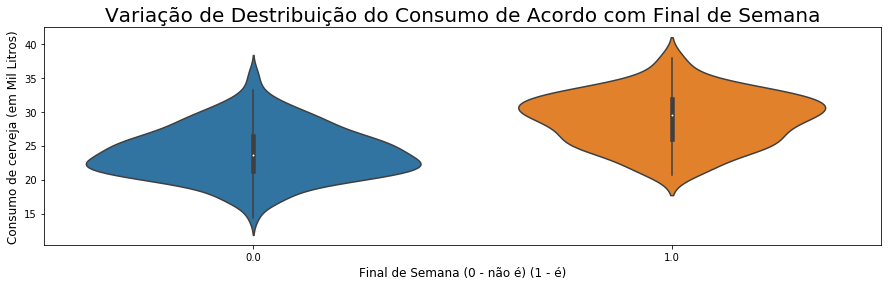

In [16]:
#Utilizando o Violinplot para o Consumo de Cerveja:
ax = sns.violinplot(x='fds', y='consumo_cerveja', data= df)

#Formatando o Display do Gráfico:
ax.figure.set_size_inches(15,4)
ax.set_title("Variação de Destribuição do Consumo de Acordo com Final de Semana", fontsize=20)
ax.set_xlabel("Final de Semana (0 - não é) (1 - é)",fontsize = 12)
ax.set_ylabel("Consumo de cerveja (em Mil Litros)",fontsize = 12)

#Imprimindo o Gráfico na tela:
ax

E pelo jeito sim, podemos ver nitidamente que o Final de Semana possui uma mediana (representada pelo ponto branco) maior do que a mediana no Dia de Semana.

### Q8. O Consumo de Cerveja possui alguma Anomalia na Distribuição?

Mas será que essa distribuição do consumo de cerveja está consistente?

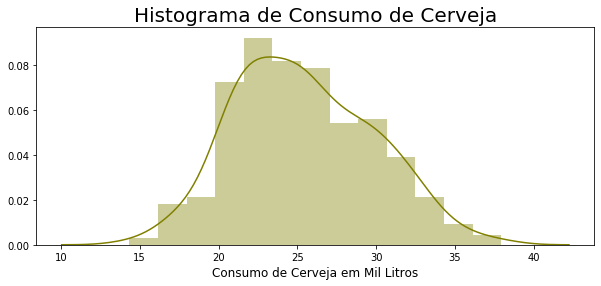

In [17]:
#Utilizando o Histograma para o Consumo de Cerveja:
ax = sns.distplot(df["consumo_cerveja"],color="olive")

#Formatando o Display do Gráfico:
ax.figure.set_size_inches(10,4)
ax.set_title("Histograma de Consumo de Cerveja", fontsize = 20)
ax.set_xlabel("Consumo de Cerveja em Mil Litros", fontsize = 12)

#Imprimindo o Gráfico na tela:
ax

Vimos que o Consumo de Cerveja está com uma distribuição normal. Não há dados atípicos ou outliers.

### Q9. Qual a correlação entre as variáveis?

Para buscarmos mais Correlações ou talvez Causa e Efeitos, usamos a função "corr()" para mostrar a Correlação entre as distribuições dessas variáveis.

In [18]:
#Matriz de Correlação entre as variáveis:
df.corr().round(2)

,temp_med,temp_min,temp_max,precipitacao,fds,consumo_cerveja,month
temp_med,1.00,0.86,0.92,0.02,-0.05,0.57,-0.10
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39,-0.17
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64,-0.07
precipitacao,0.02,0.10,-0.05,1.00,0.00,-0.19,0.01
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51,-0.01
consumo_cerveja,0.57,0.39,0.64,-0.19,0.51,1.00,0.04
month,-0.10,-0.17,-0.07,0.01,-0.01,0.04,1.00


Para uma representação visual dessa matriz de correlação, podemos utilizar a função '.heatmap()'.

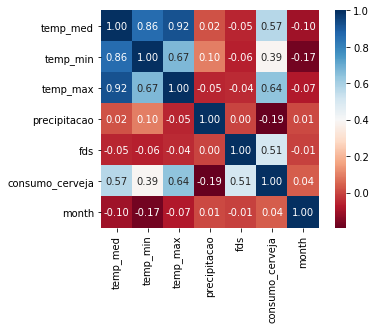

In [19]:
#Visualização através do Heatmap:
sns.heatmap(df.corr(), cmap='RdBu', fmt='.2f', square=True, annot= True)

Para o Consumo de Cerveja, é visto que:
*   O aumento da temperatura implica em um maior consumo de cerveja.
*   Se é final de Semana, o consumo de Cerveja está aumentando.
*   Se Estiver Chovendo (Alta Precipitação) você terá um consumo de Cerveja reduzido.

Vamos ver a distribuição de variáveis utilizando o Pairplot asseguir.


### Q9. Como uma Variável está se comportando com outra Variável (Pairplot)?

Para entendermos melhor o que está acontecendo com esses fatores que influenciam no Consumo, vamos ver um Pairplot das variáveis desse DataFrame:

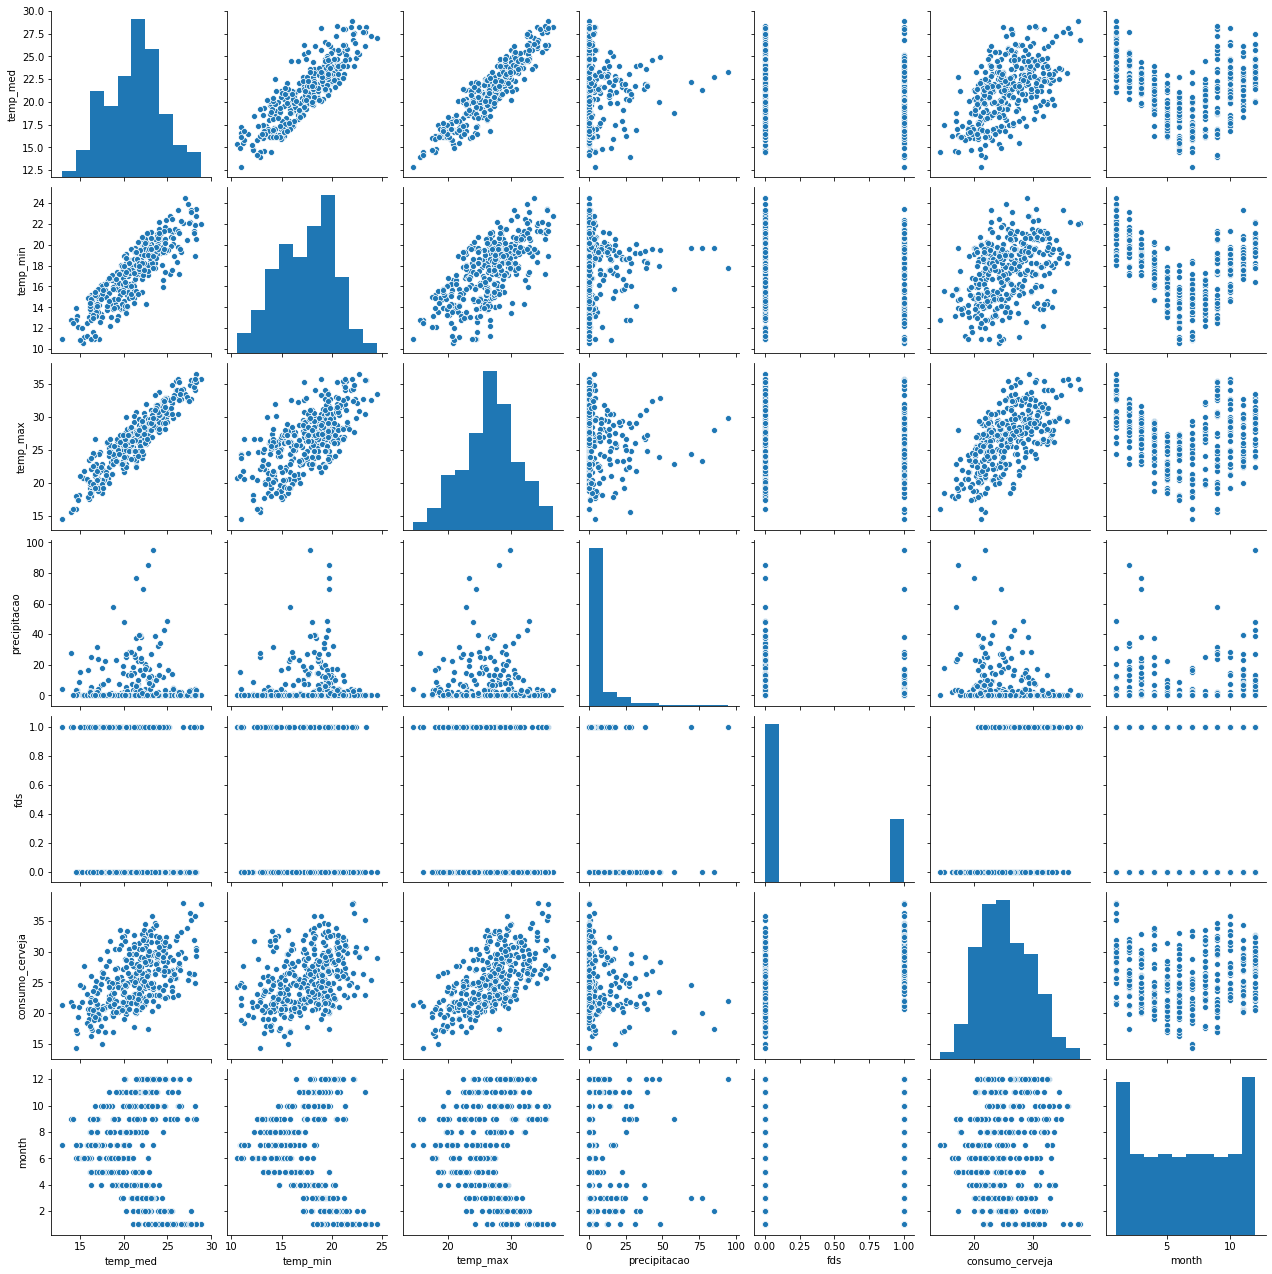

In [20]:
#Pairplot do Dataframe (Plota gráficos relacionando todas as variáveis):
ax = sns.pairplot(df)

Estamos percebendo que a Temperatura afeta diretamenta o consumo de cerveja quando observamos a linha de Consumo de Cerveja.

### Q10. Qual o comportamento da Temperatura em relação ao Consumo de Cerveja?

O Jointplot é utilizado para visualizar a dispersão entre duas variavéis e, ao mesmo tempo, verificar os histogramas de cada variável e a linha da regressão linear.

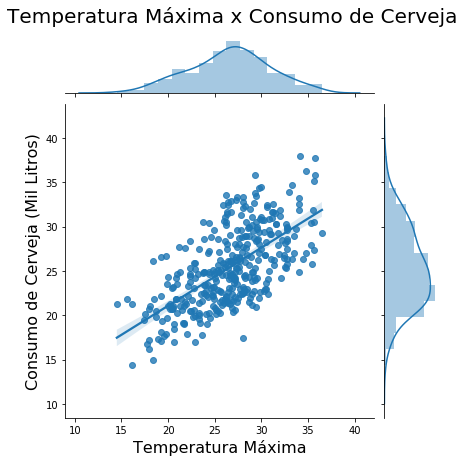

In [21]:
#Chama o Seaborn para plotar um gráfico do tipo Jointplot.
#Utiliza as variáveis de temperatura e consumo de cerveja:
ax = sns.jointplot(x = df["temp_max"], y = df["consumo_cerveja"], kind = "reg")

#Formatação do Display do Gráfico:
ax.fig.suptitle("Temperatura Máxima x Consumo de Cerveja", fontsize = 20, y = 1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja (Mil Litros)",fontsize = 16)

O Gráfico acima mostra um aumento do consumo de acordo com o aumento da temperatura Máxima.

Assim, podemos replicar as mesmas teses para a temperatura Média e Mínima.

### Q11. Qual o comportamento da Precipitação em relação ao Consumo de Cerveja?
Observando o consumo de Cerveja de acordo com a Precipitação, podemos observar que a Precipitação (Chuva) reduz esse consumo.

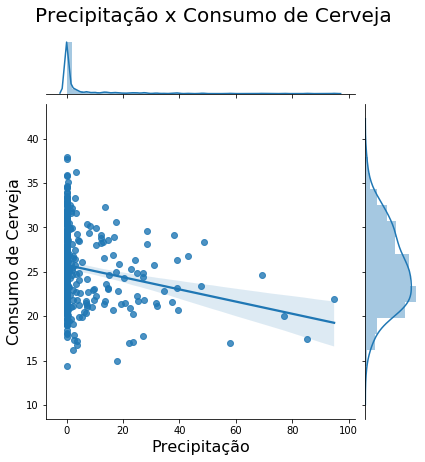

In [22]:
#Chama o Seaborn para plotar um gráfico do tipo Jointplot.
#Utiliza as variáveis de precipitação e consumo de cerveja:
ax = sns.jointplot(x = df["precipitacao"], y = df["consumo_cerveja"], kind = "reg")

#Formatação do Display do Gráfico:
ax.fig.suptitle("Precipitação x Consumo de Cerveja", fontsize = 20, y = 1.05)
ax.set_axis_labels("Precipitação", "Consumo de Cerveja",fontsize = 16)

## Estimando o Consumo de Cerveja através de um Modelo de Regressão Linear:

<p Após analisarmos algumas das variáveis e suas correlações, está na hora de começarmos com o Modelo de Regressão Linear. A Regressão Linear tem como finalidade estimar um valor "y" (ou Variável Explicada - Dependente) através de outras variáveis "Xi" (ou Variável Explicativa - Independente).

Para descrobrir a relação das variáveis explicativas com a variável explicada, é formulada a seguinte equação:
![](https://github.com/GabrielTrentino/Regressao-Linear/blob/master/RegLinear.jpg?raw=true)

Em que:
*    $Y_i$ - Variável Explicada - O que o modelo buscará prever (no nosso caso é o consumo de cerveja).
*    $\beta_1$ - Intercepto - A constante que representa a interceptação da reta ao eixo vertical. (O consumo de cerveja quando as demais variáveis forem nulas).
*    $\beta_2$ - Coeficiente Angular da primeira variável $X_2i$
*    $X_2i$ - Primeira variável explicativa (Temperatura Máxima).
*    $\beta_3$ - Coeficiente Angular da segunda variável $X_3i$
*    $X_3i$ - Segunda variável explicativa (Chuva ou Precipitação).
*    $\beta_4$ - Coeficiente Angular da terceira variável $X_4i$
*    $X_4i$ - Terceira variável explicativa (Final de Semana).
*    $u_i$ - Representa todos os fatores resíduais (possíveis erros de imprecisão).
</p>

### Para o Consumo de Cerveja:

O nosso objetivo em criar um metodo preditivo para o Consumo de Cerveja é que possamos colocar valores de temperatura máxima, precipitação e se é final de semana ou não para **obter um valor aproximado do Consumo de Cerveja** da linha de tendência.

Para isso, precisamos utilizar a biblioteca **Sklearn**, que foi importada anteriormente, para podermos treinar a máquina para conseguir predizer valores do Consumo de Cerveja de acordo com as variáveis que selecionamos.

Com a finalidade de auxiliar a Regressão Linear do **Sklearn** precisamos criar um Data Frame (chamado de X) com nossas variáveis (Temperatura Máxima, Precipitaçaõ, Final de semana) e uma Série (Data Frame de uma coluna) com a quantidade de Cerveja consumida, utilizando os dados disponibilizados pelo arquivo ".csv". 

Chamamos a biblioteca "sklearn.model_selection" para importarmos a função "train_test_split" que será responsável pela segmentação das variáveis "y" e "X" em X_train, X_test, y_train e y_test.

O objetivo de dividirmos essas variáveis em Treino e Testes é que possamos **verificar o grau de assertividade da nossa predição**, isto é, vamos poder medir o quanto preciso nosso modelo está!

#### Criação da Série Classificatória (y) e Data Frame (X) através do DataFrame original (df):

Como dito anteriormente as variáveis Temperatura Máxima, Precipitação e Final de Semana irão predizer o nosso consumo e, para isso, devemos separar em duas novas variáveis "y" e "X":

In [0]:
#"y" é o Consumo de Cerveja do DataFrame (df):
y = df["consumo_cerveja"]

#"X" é um novo DataFrame que utiliza de algumas variáveis do DataFrame(df):
X = df[["temp_max", "precipitacao", 'fds']]

#### Criando Datasets de Treino e Teste:
Para Criarmos os Datasets de Treino e de test precisamos utilizar a função "train_test_split". Ela recebe as demais colunas dos DataFrame (X) e a classe de classificação (y) como principais argumentos. Em seguida, temos que definir o tamanho do Dataset de treinamento pelo argumento **"test_size = 0.3" que segmentará em 30% do tamanho para o Teste** e 70% para o Treino.

A função "train_test_split" faz a divisão dos dataframes de forma aleatória, pegando a linha 5 para ser a linha 1 e a linha 2054 para ser a nova linha 2. Mas para que essa divisão seja feita sempre da mesma forma aleatória colocamos uma "SEED" chamada de "random_state". O "random_state" faz com que essa aleatóriedade da seleção se mantenha a mesma, **sem ele, toda vez que executamos o código, teremos resultados diferentes**.

In [0]:
#A função utilizada retorna pra gente uma tupla com com 4 DataFrames.
#Por isso, segmentamos da seguinte forma:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Verificando as dimensões dos Datasets:

Após a segmentação do Dataset, podemos verificar **em quantas linhas foram divididos os Data Frame**. E, dessa forma, podemos comparar com o DataFrame original e perceber o que está acotecendo nessa divisão.

In [25]:
#Verificando a quantidade de linhas do X_train e X_test:
print("X_train possui {} entradas\nX_test possui {} entradas".format(X_train.shape[0], X_test.shape[0]))

#Verificando quantos % o X_test faz parte do X:
print("X_test/X = {:.2f}%".format(X_test.shape[0]/X.shape[0]*100))

#Verificando quantos % o X_test decrescido de uma unidade tem em relação a X:
print("Se usarmos uma linha a menos, teriamos: {:.2f}%".format((X_test.shape[0]-1)/X.shape[0]*100))

X_train possui 255 entradas
X_test possui 110 entradas
X_test/X = 30.14%
Se usarmos uma linha a menos, teriamos: 29.86%


O interessante aqui é que usamos um "test_size = 0.3" isso significa que o nosos X_test deve ter 30% dos valores de X, mas na verdade, ele possue 30.14% dos valores.

Essa observação dos valores motra que **a função "train_test_split" pega os primeiros 30% valores + 1** um valor para o segmento de Teste.

Enquanto que para o segmento de Treino, ele pega um valor a menos.

#### Criando a classe e treinando:

Agora o próximo passo é Instanciar a classe LinearRegression() para que possamos acessar as funções de Regressão Linear que estão dentro dela. Para isso criamos uma variável chamada "modelo". **Ao instanciar, a variável modelo passa a ser uma instância da classe LinearRegression().**

Para que em seguida, possamos utilizar a função ".fit()" que serve para treinar a máquina com os padrões de X_train e y_train. Ao utilizar o ".fit()", o instanciamento ja direciona o algoritmo para uma Regressão Linear.

In [26]:
#Instanciamento do modelo como LinearRegression():
modelo = LinearRegression()

#Treinamento da máquina utilizando a função ".fit()":
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Obtendo o Coeficiente de Determinação:

O coeficiente de determinação (R²) é uma medida resumida que **diz quanto a linha de regressão ajusta-se aos dados**. É um valor entra 0 e 1.

In [27]:
#Obtendo o Valor do Coeficiente de Determinação R²:
print("R² = {}".format(modelo.score(X_train, y_train).round(4)))

R² = 0.7052


#### Obtendo o Coeficiente de determinação do nosso modelo:
Essa parte é a mais importante, se não a mais interessante até então! Aqui iremos ver o quanto nosso modelo consegue predizer (chutar) quais valores do Consumo de Cerveja estimados de acordo com as demais variáveis selecionadas, que chamaremos de y_previsto.

Isso aqui, nada mais é que um teste de precisão. Podemos ver o quão preciso podemos chegar.

In [28]:
#Fazendo a máquina Chutar os valores do Consumo de Cerveja:
y_previsto = modelo.predict(X_test)

#Visualizar os 5 primeiros termos de X_test e y_previsto:
print(X_test.head().round(2))
print('\n', y_previsto[:5].round(2))

     temp_max  precipitacao  fds
193      28.7           0.0  0.0
33       31.1           1.6  0.0
15       32.7           2.0  0.0
309      22.8           0.0  0.0
57       31.4           0.6  0.0

 [25.55 27.07 28.12 21.62 27.32]


Ao comparar a influência da Temperatura Máxima, Precipitação e Fds, a Regressão Linear retorna um consumo de cerveja de 25.55 mil litros para a primeira linha de X_test.

Agora, se quisermos comparar com o resultado verdadeiro, armazenado em y_test. Temos a seguinte situação:

In [29]:
#Imprimindo o Verdadeiro Valor e comparando com o Chute da máquina:
print("O verdadeiro valor: {} mil litros \nO que foi previsto pela Regressão Linear{} mil litros"
      .format(y_test[0], y_previsto[0].round(3)))

#O quanto próximos/assertivos estamos?
print("\nA aproximação que temos pela regressão linear é R² = {}".format(metrics.r2_score(y_test, y_previsto).round (4)))

O verdadeiro valor: 25.461 mil litros 
O que foi previsto pela Regressão Linear25.554 mil litros

A aproximação que temos pela regressão linear é R² = 0.7487


#### Determinando Intercepto e Coeficientes Estimados:

![](https://github.com/GabrielTrentino/Regressao-Linear/blob/master/Consumo-Cerveja/Regress%C3%A3oLinear.jpg?raw=true)

Como dito anteriormente, ao utilizarmos a Regressão Linear, estamos criando uma "reta" que varia seu comportamento de acordo com suas variáveis. E essa variação é determinado pelos Coeficientes de cada variável. Enquanto que o Intercepto é o valor obtido ao esperar que todas as outras variáveis são nulas.

Para obter o Intercepto, utilizamos a função ".intercept_".

Para obter o Coeficiente de cada variável, usamos a função ".coef_". Essa função retorna uma lista com os coeficentes. A ordem desses coeficientes serão de acordo com as colunas que você inicializou anteriormente.

In [30]:
#Determinando o Intercepto:
print('Intercepto (B1) = {}'.format(modelo.intercept_.round(4)))

#Determinando os Coeficientes:
print('Coeficiente Temp Max (B2) = {}'.format(modelo.coef_[0].round(4)))
print('Coeficiente Precipitação (B3) = {}'.format(modelo.coef_[1].round(4)))
print('Coeficiente Final de Semana (B4) = {}'.format(modelo.coef_[2].round(4)))

Intercepto (B1) = 6.3962
Coeficiente Temp Max (B2) = 0.6675
Coeficiente Precipitação (B3) = -0.0531
Coeficiente Final de Semana (B4) = 5.335


Interpretação dos Coeficientes Estimados:

*  **Intercepto** - Excluindo o efeito das variáveis explicativas (X2 = X3 = X4 = 0) o efeito médio no Consumo Médio de Cerveja seria de 6.3962 mil litros **(6396,2 litros)**.
*  **Temperatura Máxima (°C)** - Mantendo-se os valores de X3 (Chuva) e X4 (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de 0.6675 mil litros **(667,5 litros)**.
*  **Chuva (mm)** - Mantendo os valores de X2 (Temperatura Máxima) e X4 (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média de -0.0531 mil litros **(-53,1 litros)**.
*  **Final de Semana (Sim/Não)** - Mantendo-se os valores de X2 (Temperatura Máxima) e X3 (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de 5.335 mil litros **(5335 litros)**.

#### Estimando um Consumo:

Para estimarmos o consumo, precisamos definir antes as três variáveis: Temperatura Máxima, Chuva (Precipitação) e Se é final de semana ou não. Para isso, definiremos as variáveis a seguir e usaremos a função ".predict()"

Essa função, nos retorna uma lista de um único elemento, para isso, utilizamos a indexação [0] para retornar esse valor.

In [31]:
#Criando as Entradas das Variáveis:
temp_max = 26
chuva = 0
fds = 1

#Armazenando as Entradas em uma Série:
entrada = [[temp_max, chuva, fds]]

#Predizendo o Cosumo de Cerveja (em Mil Litros):
print('O modelo está estimando um consumo de {} mil litros'.format(modelo.predict(entrada)[0].round(3)))

O modelo está estimando um consumo de 29.087 mil litros


#### Gráfico de Dispersão entre Valor Estimado e o Real:

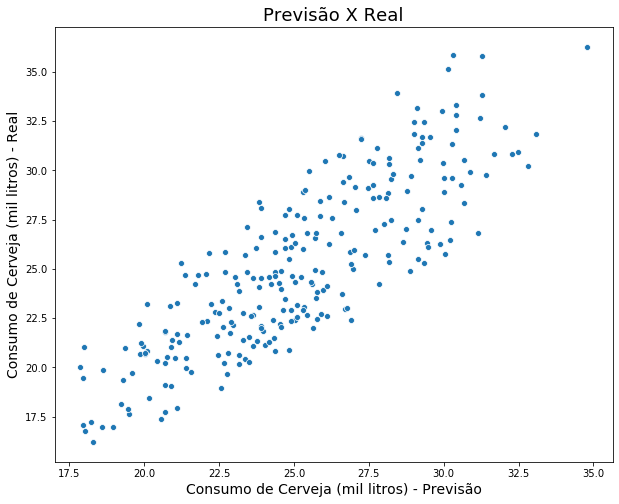

In [32]:
#Fazer com que a máquina chute os valores do próprio treinamento anterior para comparar:
y_previsto_train = modelo.predict(X_train)

#Chamando o Seaborn para plotar um gráfico do tipo scatter:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)

#Configurando a figura:
ax.figure.set_size_inches(10,8)
ax.set_title('Previsão X Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (mil litros) - Previsão', fontsize = 14)
ax.set_ylabel('Consumo de Cerveja (mil litros) - Real', fontsize = 14)

#Plotando o gráfico:
ax

Com esse gráfico executado, podemos visualizar que para uma predição de até 30 mil litros a máquina consegue ter um chute bem aproximado do real. Mas acima disso, começa haver uma certa dispersão.

## Conclusões:
Esses processos demonstrados aqui tem como o objetivo de mostrar o passo a passo das identificações da correlação de variáveis, tratamento do Data Frame, alguns passos para a Regressão Linear e o Machine Learning.

Vimos coisas interessantes do Machine Learning:
*   Segmentação do banco de dados entre Teste e Treino.
*   O processo de Regressão Linear e o seu coeficiente de Determinação.
*   Predizer o Consumo de Cerveja através de novas entradas.
*   Comportamento de cada Variável Isolada.
*   Gráfico De Dipsersão entre o previsto e o Real.

Podemos ainda continuar o trabalho de Regressão Linear, tais como:

*   Calculo de Resíduos (Diferença entre o Real e o Previsto).
*   Testar a Predição com outra variável de temperatura (Mínima ou Média).
*   Testar a Predição com todas as variáveis disponíveis.
